In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import seaborn
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Line3DCollection


BRICK_X = 124000
BRICK_Y = 99000
BRICK_Z = 75000
SAFE_M = 10000
dZ = 205

In [5]:
df = pd.read_csv('DS_2_train.csv', index_col=0)

/opt/conda/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [49]:
uz = df.Z.unique(); lz = len(uz)
print(np.sort(uz))
ub = df.brick_number.unique(); lb = len(ub)
print(np.sort(ub))
ue = df.event_id.unique(); le = len(ue)
print(np.sort(ue))
df.head()

[     0.   1293.   2586.   3879.   5172.   6465.   7758.   9051.  10344.
  11637.  12930.  14223.  15516.  16809.  18102.  19395.  20688.  21981.
  23274.  24567.  25860.  27153.  28446.  29739.  31032.  32325.  33618.
  34911.  36204.  37497.  38790.  40083.  41376.  42669.  43962.  45255.
  46548.  47841.  49134.  50427.  51720.  53013.  54306.  55599.  56892.
  58185.  59478.  60771.  62064.  63357.  64650.  65943.  67236.  68529.
  69822.  71115.  72408.]
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]
[ -999   357   479   510   654   686   751   757  1098  1228  1379  1384
  1438  1448  1459  1506  1571  1625  1954  2097  2208  

,event_id,X,Y,Z,TX,TY,chi2,signal,brick_number
index,,,,,,,,,
0,35130,50550.007812,66924.796875,65943.0,0.639179,-0.086816,0.583319,1.0,53
1,-999,48811.390625,65584.648438,12930.0,0.569996,0.294196,1.582101,0.0,49
2,-999,30120.525391,28329.425781,21981.0,-0.366648,-0.379520,1.292502,0.0,39
3,-999,67186.773438,23033.931641,68529.0,-0.434561,0.502130,2.832125,0.0,65
4,-999,64832.343750,64279.328125,7758.0,0.139993,-0.417299,2.959314,0.0,13


/opt/conda/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


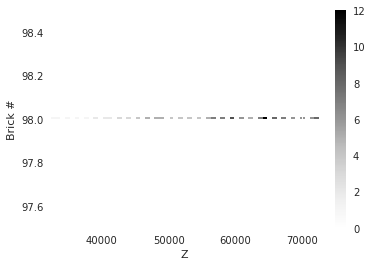

In [51]:
# dfs = df.query("signal==1")
dfs = df.query("event_id == 35528")
plt.hist2d(dfs.Z, dfs.brick_number, bins=(lz, lb))
plt.xlabel("Z"); plt.ylabel("Brick #")
plt.colorbar(); plt.show()

/opt/conda/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


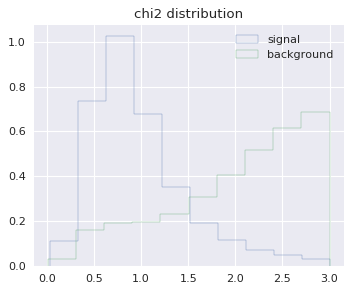

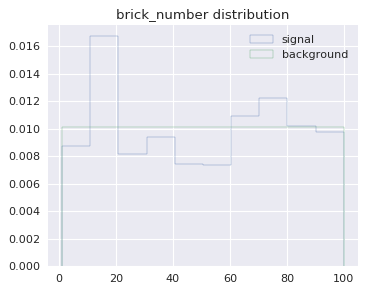

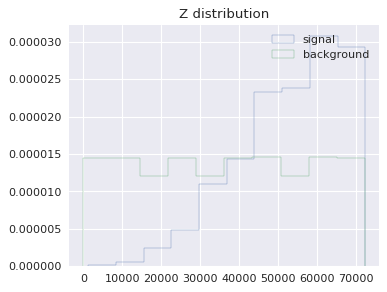

In [44]:
  
f_plot("chi2"); f_plot("brick_number"); f_plot("Z")

In [29]:
def plot_bg_and_mc(pbg, pmc, id=0, step=1):
    df = pbg
    # mind the order!
    d0 = pd.DataFrame([
                df['Z'][::step],
                df['X'][::step],
                df['Y'][::step]],
                index=['z', 'x', 'y']).T
    numtracks = d0.shape[0]
    dd = pd.DataFrame([
            df['TX'][::step]*dZ,
            df['TY'][::step]*dZ],
            index=['x', 'y']).T
    dd.insert(loc=0, column='z', value=dZ)
    d1 = d0 + dd
    # print d0, d1
    C = plt.cm.Blues(0.5)
    lc_bg = Line3DCollection(list(zip(d0.values, d1.values)), colors=C, alpha=0.1, lw=2)

    df = pmc

    # mind the order!
    d0 = pd.DataFrame([
                df['Z'],
                df['X'],
                df['Y']],
                index=['z', 'x', 'y']).T
    numtracks = d0.shape[0]
    dd = pd.DataFrame([
            df['TX']*dZ,
            df['TY']*dZ],
            index=['x', 'y']).T
    dd.insert(loc=0, column='z', value=dZ)
    d1 = d0 + dd
    print(d1.shape)
    #print (d0)§
    C = plt.cm.Reds(0.5)
    lc_mc = Line3DCollection(list(zip(d0.values, d1.values)), colors=C, alpha=0.9, lw=2)
    
    fig = plt.figure(figsize=(12,8))
    ax = fig.gca(projection='3d')
    ax.view_init(azim=-50, elev=10)
    ax.add_collection3d(lc_mc)
    ax.add_collection3d(lc_bg)
    
    # mind the order!
    ax.set_xlabel("z")
    ax.set_ylabel("x")
    ax.set_zlabel("y")  
    ax.set_xlim(0, BRICK_Z)
    ax.set_ylim(0, BRICK_X)
    ax.set_zlim(0, BRICK_Y)

(2939, 3)


/opt/conda/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


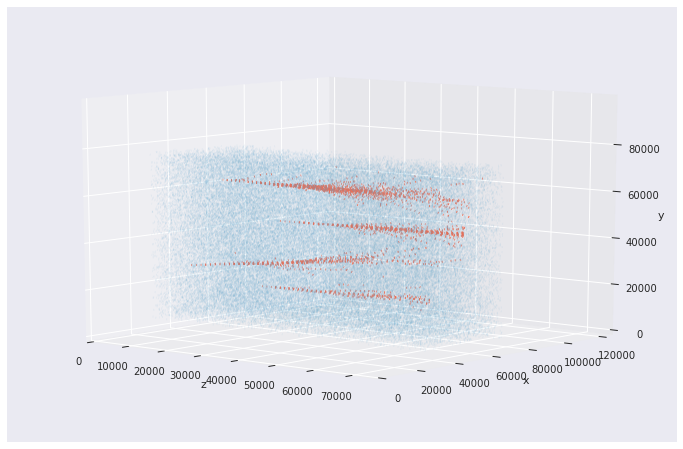

In [30]:
%matplotlib inline
plot_bg_and_mc(df[np.logical_and(df.brick_number == 1, df.signal == 0)], df[np.logical_and(df.brick_number == 1, df.signal == 1)])

In [35]:
train_df = df[df.signal == True].values[:, 1:8]
print(len(train_df))

162209


In [36]:
train_df = np.concatenate([train_df, df[df.signal == False].values[:150000, 1:8]])

In [38]:
len(train_df)
train_df.shape

(312209, 7)

In [43]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth = 5, n_estimators = 100, n_jobs = -1)

In [44]:
clf.fit(train_df[:, :-1], np.array(train_df[:, -1], dtype = int))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [53]:
df_test = pd.read_csv('DS_2_test.csv', index_col=0)

/opt/conda/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [54]:
df_test.head()
print(len(df_test))

9789204


In [47]:
prediction = clf.predict_proba(df_test.values[:, :-1])[:, 1]

In [49]:
baseline = pd.DataFrame(prediction, columns=['Prediction'])
baseline.index.name = 'Id'
baseline.to_csv('baseline.csv', header=True)